In [1]:
# Import the necessary libraries that are being used below
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, RNN, GRU, Input, Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import seaborn as sns


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# readinag given csv file
# and creating dataframe
df = pd.read_csv("Multi_labeled_CAN_dataset.csv" )

In [3]:
df

,Timestamp,ID,DLC,DATA,Class
0,0.000000e+00,0000 000,8,00 00 00 00 00 00 00 00,1
1,2.710000e-04,0080 000,8,00 17 dc 09 16 11 16 bb,1
2,4.950000e-04,0000 000,8,00 00 00 00 00 00 00 00,1
3,7.360000e-04,0081 000,8,40 84 87 00 00 00 00 6b,1
4,9.830000e-04,0000 000,8,00 00 00 00 00 00 00 00,1
...,...,...,...,...,...
4613434,1.481193e+09,05e4 000,3,00 02 00,3
4613435,1.481193e+09,0153 000,8,00 80 10 ff 00 ff a0 2e,3
4613436,1.481193e+09,0165 000,8,0e d8 7f 00 00 00 03 aa,3
4613437,1.481193e+09,0220 000,8,f4 03 f7 03 0c 00 3a 10,3


In [4]:

label_encoder = LabelEncoder()
df['ID'] = label_encoder.fit_transform(df['ID'])
df['DATA'] = label_encoder.fit_transform(df['DATA'])
X = df[['Timestamp', 'ID', 'DLC', 'DATA']].values
y = df['Class'].values

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
# Reshape the input data to have a temporal dimension
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train[0]

array([[-0.52454424, -0.93039415, -2.4408589 , -1.00866128]])

In [8]:
inputs = Input(shape=(X.shape[1], X.shape[2]))
gru_output = GRU(64, return_sequences=True)(inputs)
# gru_output = Dropout(0.5)(gru_output)
# attention = Attention()([gru_output, gru_output])

# # Concatenate the GRU output and the attention output
# context_vector = Concatenate(axis=-1)([gru_output, attention])

# # Flatten the context vector
# flattened_context = tf.keras.layers.Flatten()(context_vector)

# Pass through Dense layer
dense_output = Dense(8, activation='relu')(gru_output)
final_output = Dense(4, activation = 'softmax')(dense_output)
output = Reshape((4,))(final_output)

# Define the model
model = Model(inputs=inputs, outputs=output)
# model.add(Dense(8, activation='ReLU'))
# model.add(Dense(4, activation = 'softmax'))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 64)          │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 8)           │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 4)           │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,996 (54.67 KB)

 Trainable params: 13,996 (54.67 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.8081 - loss: 0.5463 - val_accuracy: 0.8403 - val_loss: 0.4649
Epoch 2/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - accuracy: 0.8425 - loss: 0.4581 - val_accuracy: 0.8496 - val_loss: 0.4358
Epoch 3/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.8542 - loss: 0.4302 - val_accuracy: 0.8560 - val_loss: 0.4202
Epoch 4/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.8568 - loss: 0.4172 - val_accuracy: 0.8583 - val_loss: 0.4091
Epoch 5/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.8595 - loss: 0.4073 - val_accuracy: 0.8630 - val_loss: 0.4041
Epoch 6/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - accuracy: 0.8633 - loss: 0.3985 - val_accuracy: 0.8644 - val_loss: 0.3985
Epoch 7/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 85s 6ms/step - accuracy: 0.8664 - loss: 0.3925 - val_accuracy: 0.8669 - val_loss: 0.3886
Epoch 8/50
14598/14598 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 

In [ ]:
# # Evaluate on training data
# train_loss, train_accuracy = model.evaluate(X_train, y_train)

# # Evaluate on validation data
# val_loss, val_accuracy = model.evaluate(X_val, y_val)

In [24]:
import pickle

with open('history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)



AttributeError: 'dict' object has no attribute 'history'

In [16]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)

# save to json:
# hist_json_file = 'history.json'
# with open(hist_json_file, mode='w') as f:
#     hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [17]:
with open('history', "rb") as file_pi:
    history = pickle.load(file_pi)

In [20]:
print(type(history)) 

<class 'dict'>


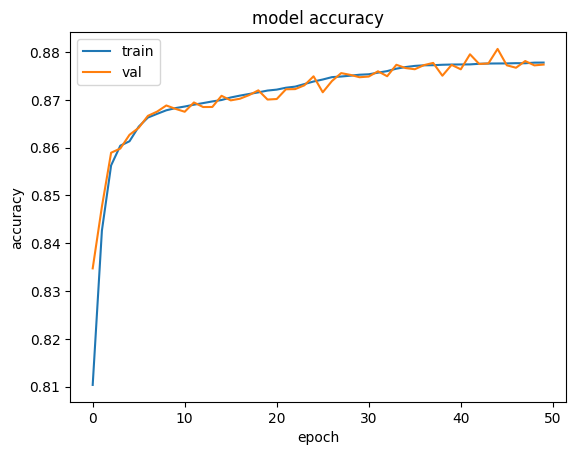

In [12]:
import matplotlib.pyplot as plt


# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs=range(1,len(loss)+1)
# plt.plot(epochs, loss, 'b.', label='training loss')
# plt.plot(epochs, val_loss, 'r.', label='validate loss')
# plt.title('training loss vs validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

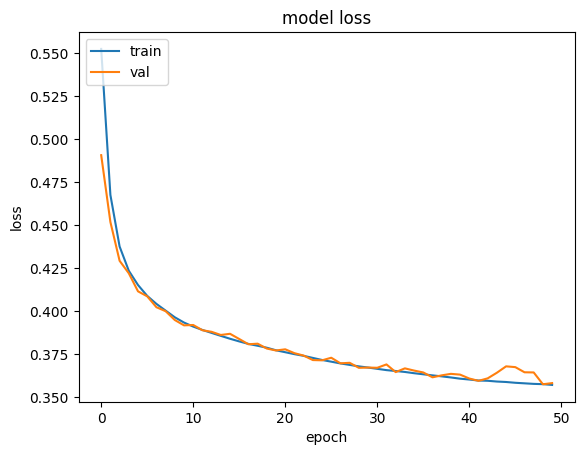

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
predicted_result = model.predict(X_test)

14417/14417 ━━━━━━━━━━━━━━━━━━━━ 12s 798us/step


In [15]:
predicted = [np.argmax(i) for i in predicted_result]
predicted

[0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 3,
 3,
 2,
 0,
 0,
 0,
 0,
 3,
 2,
 3,
 3,
 2,
 3,
 0,
 0,
 3,
 3,
 2,
 0,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 0,
 3,
 1,
 0,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 1,
 1,
 3,
 1,
 0,
 3,
 0,
 3,
 3,
 1,
 0,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,


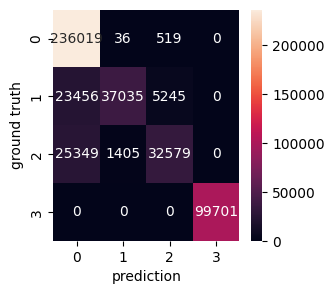

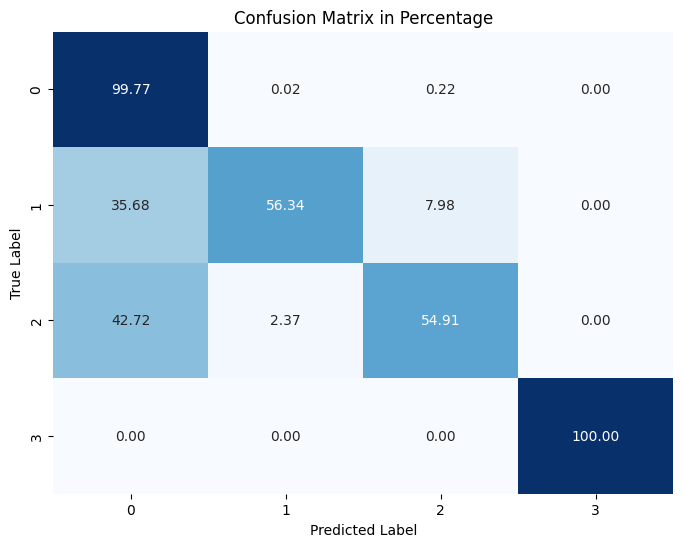

In [18]:
cmat = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

plt.figure(figsize=(3,3))
sns.heatmap(cmat, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('ground truth')



cm = tf.math.confusion_matrix(y_test, predicted)

# Convert EagerTensor to NumPy array
cm_np = cm.numpy()

# Row-wise normalization to get percentages
cm_percentage = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix in Percentage')
plt.show()

In [21]:
# import keras
model.save("Multiclass_model.h5")

In [ ]:
X_train.shape

(4152095, 1, 4)

In [22]:
# import numpy as np

# # Select a random index from the test dataset for prediction
# random_index = np.random.choice(len(X_test))

# # Get the random test data point and its corresponding label
# random_test_data = X_test[random_index]
# actual_label = y_test[random_index]

# # Reshape the random test data point to match the model input shape
# random_test_data = random_test_data.reshape(1, 1, X.shape[2])

# # Make predictions using the trained model
# y_pred = model.predict(random_test_data)

# # Convert the prediction probability to binary class (0 or 1)
# predicted_class = 1 if y_pred[0][0] >= 0.5 else 0

# # Print the predicted class and actual label
# print("Predicted Class:", predicted_class)
# print("Actual Label:", actual_label)

# # Calculate the accuracy for this random test data point
# accuracy = (predicted_class == actual_label)

# # Print the accuracy
# print("Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Predicted Class: 0
Actual Label: 3
Accuracy: False


# New Section

In [23]:
# y_pred = model.predict(X_test)

14417/14417 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


In [ ]:
# # Define custom activation functions
# def custom_sigmoid(x):
#     return 1.0 / (1.0 + tf.exp(-x))

# def custom_tanh_inference(x):
#     return tf.where(tf.math.greater(x, 0), 1.0, -1.0)

# # Create the custom GRU cell
# class MyGRUCell(tf.keras.layers.Layer):
#     def __init__(self, units, tanh_activation=tf.tanh, sigmoid_activation=tf.sigmoid):
#         super(MyGRUCell, self).__init__()
#         self.units = units
#         self.reset_gate = tf.keras.layers.Dense(units, activation=sigmoid_activation, kernel_initializer='glorot_uniform')
#         self.update_gate = tf.keras.layers.Dense(units, activation=sigmoid_activation, kernel_initializer='glorot_uniform')
#         self.candidate = tf.keras.layers.Dense(units, activation=tanh_activation, kernel_initializer='glorot_uniform')
#         self.state_size = units

#     def call(self, inputs, states, training=True):
#         h_prev = states[0]
#         r = self.reset_gate(tf.concat([inputs, h_prev], axis=-1))
#         z = self.update_gate(tf.concat([inputs, h_prev], axis=-1))
#         h_candidate = self.candidate(tf.concat([inputs, r * h_prev], axis=-1))
#         if training:
#             h_candidate = tf.tanh(h_candidate)
#         else:
#             h_candidate = custom_tanh_inference(h_candidate)
#         h_new = (1 - z) * h_prev + z * h_candidate
#         return h_new, [h_new]

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.target_spec.supported_ops = [
#   tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
#   tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
# ]
# tflite_model = converter.convert()
# # tflite_model

In [ ]:
# open("c_model.tflite", "wb").write(tflite_model)

# # Load the TFLite model
# c_model = tf.lite.Interpreter('c_model.tflite')
# c_model.allocate_tensors()

# # Get indexes of the input and output tensors
# c_model_input_index = c_model.get_input_details()[0]["index"]
# c_model_output_index = c_model.get_output_details()[0]["index"]



# c_model_predictions = []

# for x_value in X_test:
#     x_value_tensor = tf.convert_to_tensor(x_value, dtype=np.float32)
#     x_value_tensor = np.expand_dims(x_value_tensor, axis=0)
#     c_model.set_tensor(c_model_input_index, x_value_tensor)
#     c_model.invoke()
#     c_model_predictions.append(c_model.get_tensor(c_model_output_index)[0])